In [1]:
"""
air_inflow: 공기 흡입 유량 (^3/min)
air_end_temp: 공기 말단 온도 (°C)
out_pressure: 토출 압력 (Mpa)
motor_current: 모터 전류 (A)
motor_rpm: 모터 회전수 (rpm)
motor_temp: 모터 온도 (°C)
motor_vibe: 모터 진동 (mm/s)
type: 설비 번호

설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
설비 번호 1: 20HP
설비 번호 2: 10HP
설비 번호 3: 50HP
"""

'\nair_inflow: 공기 흡입 유량 (^3/min)\nair_end_temp: 공기 말단 온도 (°C)\nout_pressure: 토출 압력 (Mpa)\nmotor_current: 모터 전류 (A)\nmotor_rpm: 모터 회전수 (rpm)\nmotor_temp: 모터 온도 (°C)\nmotor_vibe: 모터 진동 (mm/s)\ntype: 설비 번호\n\n설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)\n설비 번호 1: 20HP\n설비 번호 2: 10HP\n설비 번호 3: 50HP\n'

In [2]:
import warnings

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

from src.features import build_features

warnings.filterwarnings(action='ignore')


In [13]:
df = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\train_data.csv')
test = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\test_data.csv')

df = build_features.add_motor_hp(df)
df = build_features.add_air_flow_pressure(df)
df = build_features.add_motor_vibe_freq(df)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled_df = pd.DataFrame(data_scaled, columns=df.columns)

test = build_features.add_motor_hp(test)
test = build_features.add_air_flow_pressure(test)
test = build_features.add_motor_vibe_freq(test)
train, val = train_test_split(data_scaled_df, test_size=0.2, shuffle=True, random_state=42)

# 모델 학습 및 이상치 탐지
model = IsolationForest(n_estimators=500, max_samples='auto',
                        contamination=0.0055, random_state=42)


model.fit(train.drop("type", axis=1))
val["anomaly"] = model.predict(val.drop("type", axis=1))
y_true = val["type"].apply(lambda x: 1 if x == "anomaly" else 0)
y_pred = val["anomaly"].apply(lambda x: 1 if x == -1 else 0)
macro_f1 = f1_score(y_true, y_pred, average="macro")
macro_precision = precision_score(y_true, y_pred, average="macro")
macro_recall = recall_score(y_true, y_pred, average="macro")

print("Macro F1-score: {:.4f}".format(macro_f1))
print("Macro Precision: {:.4f}".format(macro_precision))
print("Macro Recall: {:.4f}".format(macro_recall))


Macro F1-score: 0.4995
Macro Precision: 0.5000
Macro Recall: 0.4990


In [10]:
df = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\train_data.csv')
test = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\test_data.csv')

df = build_features.add_motor_hp(df)
df = build_features.add_air_flow_pressure(df)
df = build_features.add_motor_vibe_freq(df)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled_df = pd.DataFrame(data_scaled, columns=df.columns)

test = build_features.add_motor_hp(test)
test = build_features.add_air_flow_pressure(test)
test = build_features.add_motor_vibe_freq(test)


train, val = train_test_split(data_scaled_df, test_size=0.3, shuffle=True, random_state=42)

# 모델 학습 및 이상치 탐지
model = EllipticEnvelope(contamination=0.1)
model.fit(train.drop("type", axis=1))

val["anomaly"] = model.predict(val.drop("type", axis=1))
test["anomaly"] = model.predict(test.drop("type", axis=1))

y_true = val["type"].apply(lambda x: 1 if x == "anomaly" else 0)
y_pred = val["anomaly"].apply(lambda x: 1 if x == -1 else 0)
print(y_pred.value_counts())
macro_f1 = f1_score(y_true, y_pred, average="macro")
macro_precision = precision_score(y_true, y_pred, average="macro")
macro_recall = recall_score(y_true, y_pred, average="macro")

print("Macro F1-score: {:.4f}".format(macro_f1))
print("Macro Precision: {:.4f}".format(macro_precision))
print("Macro Recall: {:.4f}".format(macro_recall))

test.anomaly.value_counts()

0    667
1     72
Name: anomaly, dtype: int64
Macro F1-score: 0.4744
Macro Precision: 0.5000
Macro Recall: 0.4513


-1    7389
Name: anomaly, dtype: int64

In [14]:
df = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\train_data.csv')
test = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\test_data.csv')

In [17]:
df.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,2463.000000,2463.000000,2.463000e+03,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,2.128843,49.001137,7.000000e-01,27.490715,2372.576939,65.766707,3.452972,2.957369
std,1.202328,8.725091,2.964897e-14,13.604597,687.870774,7.797152,1.576386,2.230113
min,0.330000,32.030000,7.000000e-01,5.340000,1201.000000,50.360000,1.970000,0.000000
25%,1.280000,41.600000,7.000000e-01,17.110000,1784.500000,59.150000,2.880000,1.000000
50%,1.960000,48.980000,7.000000e-01,25.850000,2358.000000,65.640000,3.260000,3.000000
75%,2.820000,56.355000,7.000000e-01,36.000000,2971.000000,72.275000,3.730000,5.000000
max,6.220000,64.960000,7.000000e-01,72.000000,3564.000000,80.520000,21.870000,7.000000


In [16]:
test.describe()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,2.103129,49.042735,0.699840,27.417935,2373.820003,65.771623,3.345523,2.957369
std,1.163998,8.686208,0.005377,13.234089,687.737182,7.741473,0.644199,2.229811
min,0.340000,32.080000,0.490000,5.370000,1200.000000,50.420000,1.970000,0.000000
25%,1.280000,41.510000,0.700000,17.200000,1774.000000,59.110000,2.890000,1.000000
50%,1.940000,48.760000,0.700000,26.170000,2355.000000,65.520000,3.260000,3.000000
75%,2.770000,56.580000,0.700000,35.860000,2972.000000,72.440000,3.730000,5.000000
max,6.240000,65.540000,0.700000,74.000000,3564.000000,82.390000,6.260000,7.000000


Data shape: (2463, 8)
Data summary:
        air_inflow  air_end_temp  out_pressure  motor_current    motor_rpm  \
count  2463.000000   2463.000000  2.463000e+03    2463.000000  2463.000000   
mean      2.128843     49.001137  7.000000e-01      27.490715  2372.576939   
std       1.202328      8.725091  2.964897e-14      13.604597   687.870774   
min       0.330000     32.030000  7.000000e-01       5.340000  1201.000000   
25%       1.280000     41.600000  7.000000e-01      17.110000  1784.500000   
50%       1.960000     48.980000  7.000000e-01      25.850000  2358.000000   
75%       2.820000     56.355000  7.000000e-01      36.000000  2971.000000   
max       6.220000     64.960000  7.000000e-01      72.000000  3564.000000   

        motor_temp   motor_vibe         type  
count  2463.000000  2463.000000  2463.000000  
mean     65.766707     3.452972     2.957369  
std       7.797152     1.576386     2.230113  
min      50.360000     1.970000     0.000000  
25%      59.150000     2.8

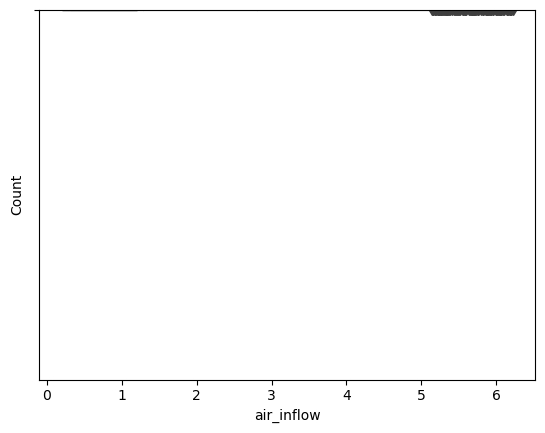

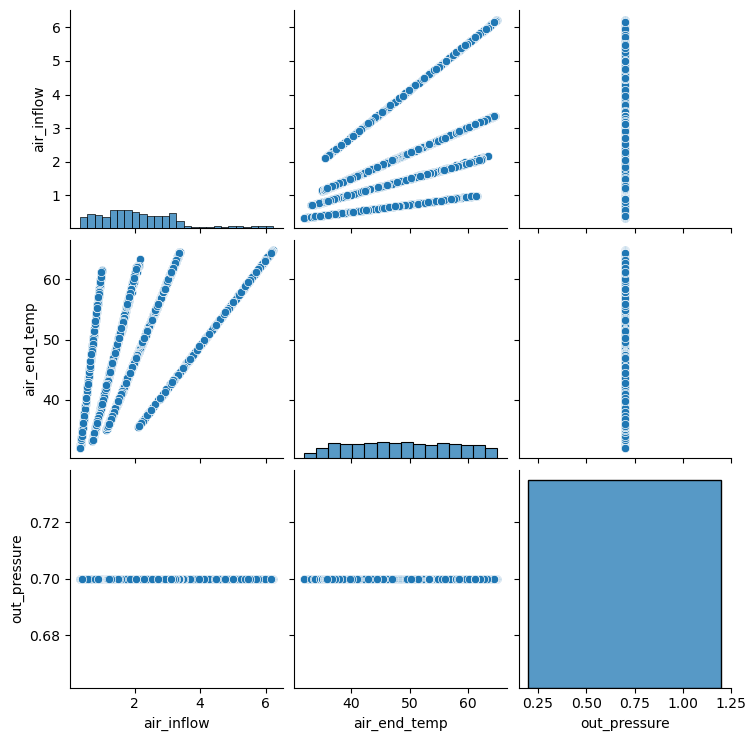

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
# 데이터 탐색
print('Data shape:', df.shape)
print('Data summary:')
print(df.describe())

# 결측치 확인

# 이상치 확인
sns.boxplot(x=df['air_inflow'])

# 변수 분포 확인
sns.histplot(x=df['out_pressure'], kde=True)

# 변수 간의 상관관계 확인
sns.pairplot(df[['air_inflow', 'air_end_temp', 'out_pressure']])

# 인사이트 도출
# 이 데이터에서는 공기 흡입 유량과 토출 압력 간에 양의 상관관계가 있으며, 이상치가 존재하는 것으로 확인되었습니다.

Data shape: (7389, 8)
Data summary:
        air_inflow  air_end_temp  out_pressure  motor_current    motor_rpm  \
count  7389.000000   7389.000000   7389.000000    7389.000000  7389.000000   
mean      2.103129     49.042735      0.699840      27.417935  2373.820003   
std       1.163998      8.686208      0.005377      13.234089   687.737182   
min       0.340000     32.080000      0.490000       5.370000  1200.000000   
25%       1.280000     41.510000      0.700000      17.200000  1774.000000   
50%       1.940000     48.760000      0.700000      26.170000  2355.000000   
75%       2.770000     56.580000      0.700000      35.860000  2972.000000   
max       6.240000     65.540000      0.700000      74.000000  3564.000000   

        motor_temp   motor_vibe         type  
count  7389.000000  7389.000000  7389.000000  
mean     65.771623     3.345523     2.957369  
std       7.741473     0.644199     2.229811  
min      50.420000     1.970000     0.000000  
25%      59.110000     2.8

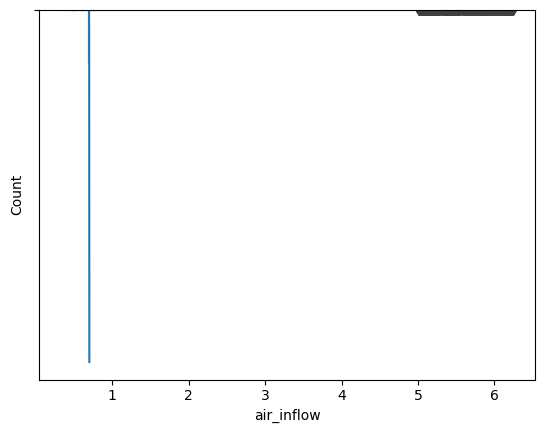

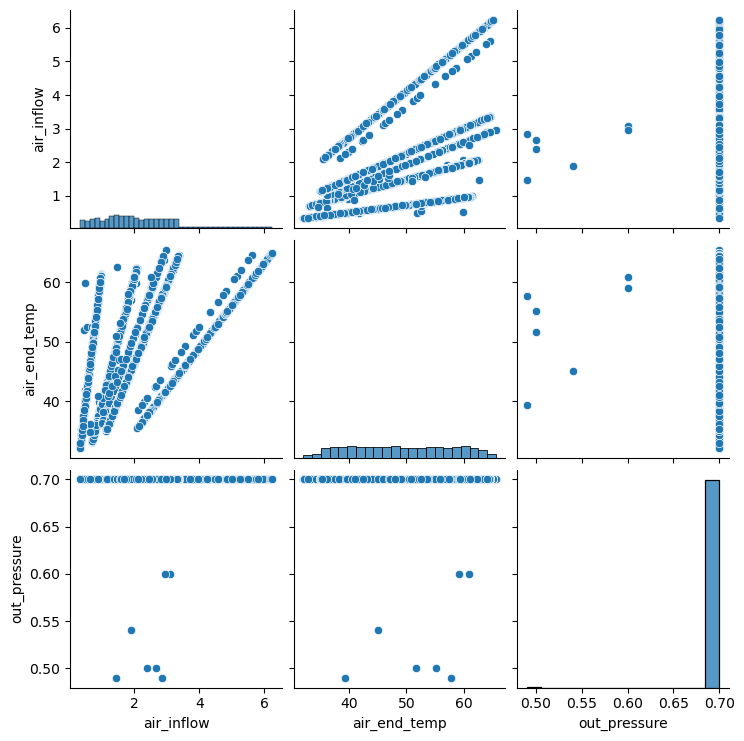

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
# 데이터 탐색
print('Data shape:', test.shape)
print('Data summary:')
print(test.describe())

# 결측치 확인

# 이상치 확인
sns.boxplot(x=test['air_inflow'])

# 변수 분포 확인
sns.histplot(x=test['out_pressure'], kde=True)

# 변수 간의 상관관계 확인
sns.pairplot(test[['air_inflow', 'air_end_temp', 'out_pressure']])

# 인사이트 도출
# 이 데이터에서는 공기 흡입 유량과 토출 압력 간에 양의 상관관계가 있으며, 이상치가 존재하는 것으로 확인되었습니다.

In [68]:
test_score = test.copy()
test_score["anomaly_score"] = model.decision_function(test_score)

In [75]:
test_score["anomaly"] = test_score["anomaly_score"].apply(lambda x: 0 if x > 0 else 1)


In [76]:
test_score.anomaly.value_counts()

0    7112
1     277
Name: anomaly, dtype: int64

In [77]:
test_score

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,motor_hp,motor_vibe_freq1,motor_vibe_freq2,anomaly_score,anomaly
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,30,-424.423282,940.44368,0.120374,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,30,-424.423282,940.44368,0.114207,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,30,-424.423282,940.44368,0.137700,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,30,-424.423282,940.44368,0.129234,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,30,-424.423282,940.44368,0.142592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7,30,-424.423282,940.44368,0.108989,0
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7,30,-424.423282,940.44368,0.097162,0
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7,30,-424.423282,940.44368,0.108996,0
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7,30,-424.423282,940.44368,0.106299,0


In [79]:
submission = pd.read_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\raw\answer_sample.csv')
submission

,type,label
0,0,-1
1,0,-1
2,0,-1
3,0,-1
4,0,-1
...,...,...
7384,7,-1
7385,7,-1
7386,7,-1
7387,7,-1


In [80]:
submission["label"] = test_score["anomaly"]

In [83]:
submission.to_csv(r'C:\Project_MB\Anomaly-Detection-of-Air-Compressor\data\submission\submission.csv', index=False)